<a href="https://colab.research.google.com/github/mahesh-keswani/ML-DL-Basics/blob/main/keras_examples/RegularizationForANN_CNN_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Resource: https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/

# We will use a standard binary classification problem
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2, l1, l1_l2

In [2]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

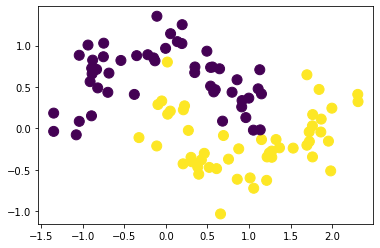

In [3]:
plt.scatter( X[:, 0], X[:, 1], c=y, s=100 );

In [4]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=1000, verbose=0)

<h1>Without regularization</h1>

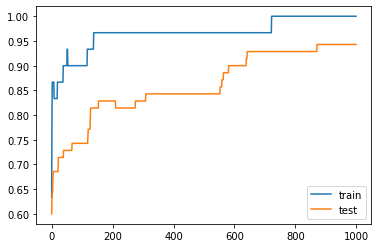

In [7]:
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend();

In [8]:
# We can see an expected shape of an overfit model where test accuracy increases to a point and then begins to decrease again.

<h1>With regularization</h1>

In [9]:
# MLP Model With Weight Regularization
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.001) ))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=1000, verbose=0)

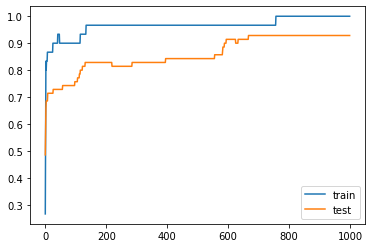

In [11]:
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend();

In [12]:
# As expected, we see the learning curve on the test dataset rise and then plateau, indicating that the model may not have overfit the training dataset.

<h1>Grid Search Regularization Hyperparameter</h1>

In [13]:
'''
    Once we can confirm that weight regularization may improve your overfit model, we can test different values of the regularization parameter.
    It is a good practice to first grid search through some orders of magnitude between 0.0 and 0.1, then once a level is found, to grid search on that level.
'''

'\n    Once we can confirm that weight regularization may improve your overfit model, we can test different values of the regularization parameter.\n    It is a good practice to first grid search through some orders of magnitude between 0.0 and 0.1, then once a level is found, to grid search on that level.\n'

In [14]:
# grid search values
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()

for param in values:
	# define model
	model = Sequential()
	model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(param)))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=500, verbose=0)
	# evaluate the model
	_, train_acc = model.evaluate(trainX, trainy, verbose=0)
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc))
	all_train.append(train_acc)
	all_test.append(test_acc)

Param: 0.100000, Train: 0.900, Test: 0.814
Param: 0.010000, Train: 0.967, Test: 0.829
Param: 0.001000, Train: 0.967, Test: 0.843
Param: 0.000100, Train: 0.967, Test: 0.843
Param: 0.000010, Train: 0.967, Test: 0.843
Param: 0.000001, Train: 0.967, Test: 0.843


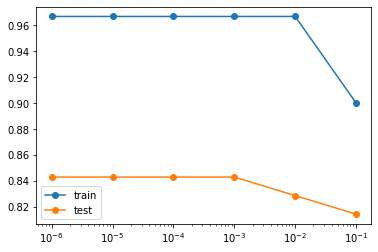

In [15]:
# plot train and test means
plt.semilogx(values, all_train, label='train', marker='o')
plt.semilogx(values, all_test, label='test', marker='o')
plt.legend();

In [16]:
# We can see that using the largest value of 0.1, results in a large drop in both train and test accuracy.

In [17]:
# For adding regularization to the bias 
# model.add(Dense(32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

# For adding regularization in CNN
# model.add(Conv2D(32, (3,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
# Weight regularization does not seem widely used in CNN models, or if it is used, its use is not widely reported.

# For adding regularization in LSTM
# model.add(LSTM(32, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
# It is common to use weight regularization with LSTM models.
# An often used configuration is L2 (weight decay) and very small hyperparameters (e.g. 10^−6). 
# It is often not reported what weights are regularized (input, recurrent, and/or bias), although one would assume that both 
# input and recurrent weights are regularized only

In [18]:
'''
    1) Try Alternates. Update the example to use L1 or the combined L1L2 methods instead of L2 regularization.
    2) Report Weight Norm. Update the example to calculate the magnitude of the network weights and demonstrate that regularization indeed made the 
       magnitude smaller.
    3) Regularize Output Layer. Update the example to regularize the output layer of the model and compare the results.
    4) Regularize Bias. Update the example to regularize the bias weight and compare the results.
    5) Repeated Model Evaluation. Update the example to fit and evaluate the model multiple times and report the mean and standard deviation of model performance.
'''

'\n    1) Try Alternates. Update the example to use L1 or the combined L1L2 methods instead of L2 regularization.\n    2) Report Weight Norm. Update the example to calculate the magnitude of the network weights and demonstrate that regularization indeed made the \n       magnitude smaller.\n    3) Regularize Output Layer. Update the example to regularize the output layer of the model and compare the results.\n    4) Regularize Bias. Update the example to regularize the bias weight and compare the results.\n    5) Repeated Model Evaluation. Update the example to fit and evaluate the model multiple times and report the mean and standard deviation of model performance.\n'

<h1>Dataset Augmentation</h1>

In [19]:
# Resource: https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

# Modern deep learning algorithms, such as the convolutional neural network, or CNN, can learn features that are invariant to their location in 
# the image. Nevertheless, augmentation can further aid in this transform invariant approach to learning and can aid the model 
# in learning features that are also invariant to transforms such as left-to-right to top-to-bottom ordering, light levels in photographs, and more.

# Image data augmentation is typically only applied to the training dataset, and not to the validation or test dataset. This is different 
# from data preparation such as image resizing and pixel scaling; they must be performed consistently across all datasets that interact with the model.

In [20]:
# Image source: https://www.flickr.com/photos/thenovys/3854468621/

# A range of techniques are supported, as well as pixel scaling methods. 
# We will focus on five main types of data augmentation techniques for image data; specifically:

# Image shifts via the width_shift_range and height_shift_range arguments.
# Image flips via the horizontal_flip and vertical_flip arguments.
# Image rotations via the rotation_range argument
# Image brightness via the brightness_range argument.
# Image zoom via the zoom_range argument.

In [21]:
# An iterator can be created for an image dataset.
# The iterator will return one batch of augmented images for each iteration.
# An iterator can be created from an image dataset loaded in memory via the flow() function; for example:
# create iterator
# it = datagen.flow(X, y)

In [22]:
# Alternately, an iterator can be created for an image dataset located on disk in a specified directory, 
# where images in that directory are organized into subdirectories according to their class.

# # create iterator
# it = datagen.flow_from_directory(X, y, ...)

In [23]:
# Once the iterator is created, it can be used to train a neural network model by 
# calling the fit_generator() function.

# The images in the dataset are not used directly. Instead, only augmented images are provided to the model. 
# Because the augmentations are performed randomly, this allows both modified images 
# and close facsimiles of the original images (e.g. almost no augmentation) to be generated and used during training.

In [24]:
# A data generator can also be used to specify the validation dataset and the test dataset. 
# Often, a separate ImageDataGenerator instance is used that may have the same pixel scaling configuration 
# (not covered in this tutorial) as the ImageDataGenerator instance used for the training dataset, but would not use 
# data augmentation. This is because data augmentation is only used as a technique 
# for artificially extending the training dataset in order to improve model performance on an unaugmented dataset.



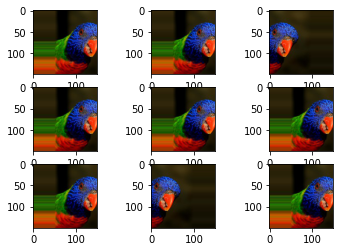

In [26]:
# A shift to an image means moving all pixels of the image in one direction, such as horizontally or vertically, 
# while keeping the image dimensions the same.

# This means that some of the pixels will be clipped off the image and there will be a region of the image where 
# new pixel values will have to be specified.

# The width_shift_range and height_shift_range arguments to the ImageDataGenerator constructor control 
# the amount of horizontal and vertical shift respectively.

# These arguments can specify a floating point value that indicates the percentage (between 0 and 1) of the 
# width or height of the image to shift. Alternately, a number of pixels can be specified to shift the image.

# Specifically, a value in the range between no shift and the percentage or pixel value will be sampled for 
# each image and the shift performed, e.g. [0, value]. Alternately, you can specify a tuple or 
# array of the min and max range from which the shift will be sampled; for example: [-100, 100] or [-0.5, 0.5].

from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('/content/bird.jpg')

# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
# the image dimensions are (150, 150)
datagen = ImageDataGenerator(width_shift_range=[-50,50])

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [27]:
# We can see in the plot of the result that a range of different randomly selected positive and negative horizontal shifts 
# was performed and the pixel values at the edge of the image are duplicated to fill in the empty part of the image created 
# by the shift.

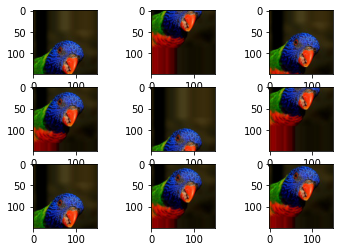

In [28]:
# Below is the same example updated to perform vertical shifts of the image via the height_shift_range argument

datagen = ImageDataGenerator(height_shift_range=0.5)

# prepare iterator
it = datagen.flow(samples, batch_size=1)

for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

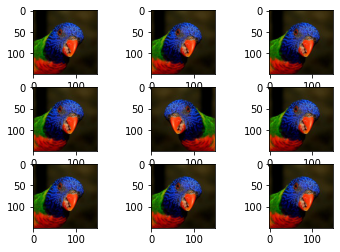

In [29]:
# Horizontal and Vertical Flip Augmentation
# An image flip means reversing the rows or columns of pixels in the case of a vertical or horizontal flip respectively.

#  The flip augmentation is specified by a boolean horizontal_flip or vertical_flip argument to the ImageDataGenerator class constructor.
#  For photographs like the bird photograph used in this tutorial, horizontal flips may make sense, but vertical flips would not.
#  For other types of images, such as aerial photographs, cosmology photographs, and microscopic photographs, perhaps 
#  vertical flips make sense.

# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# looping 9 times and generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

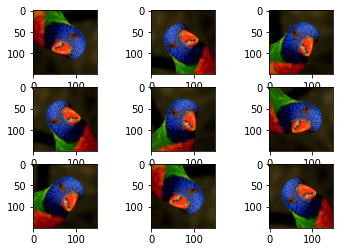

In [30]:
# Random Rotation Augmentation

# A rotation augmentation randomly rotates the image clockwise by a given number of degrees from 0 to 360.
# The rotation will likely rotate pixels out of the image frame and leave areas of the frame with no pixel data that must be filled in.

# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# The example below demonstrates random rotations via the rotation_range argument,
#  with rotations to the image between 0 and 90 degrees.

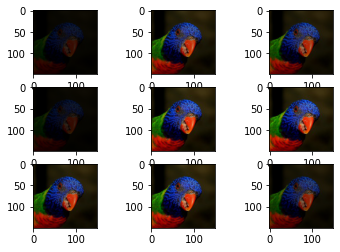

In [31]:
# Random Brightness Augmentation
# The brightness of the image can be augmented by either randomly darkening images, brightening images, or both.
# The intent is to allow a model to generalize across images trained on different lighting levels.
# This can be achieved by specifying the brightness_range argument to the ImageDataGenerator() constructor that specifies min and max range as a 
# float representing a percentage for selecting a brightening amount.
# Values less than 1.0 darken the image, e.g. [0.5, 1.0], whereas values larger than 1.0 brighten the image, 
# e.g. [1.0, 1.5], where 1.0 has no effect on brightness.
# The example below demonstrates a brightness image augmentation, allowing the generator to randomly darken the 
# image between 1.0 (no change) and 0.2 or 20%.

# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2, 1.0])

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

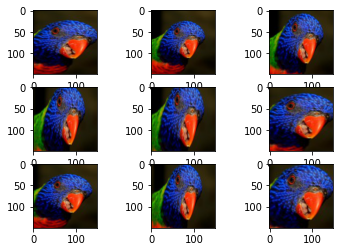

In [32]:
# Random Zoom Augmentation
# A zoom augmentation randomly zooms the image in and either adds new pixel values around the image or interpolates pixel values respectively.
# Image zooming can be configured by the zoom_range argument to the ImageDataGenerator constructor. You can specify the percentage of the zoom as a single float or a range as an array or tuple.
# If a float is specified, then the range for the zoom will be [1-value, 1+value]. For example, if you specify 0.3, then the range will be [0.7, 1.3], or between 70% (zoom in) and 130% (zoom out).
# The zoom amount is uniformly randomly sampled from the zoom region for each dimension (width, height) separately.

# The zoom may not feel intuitive. Note that zoom values less than 1.0 will zoom the image in, e.g. [0.5,0.5] makes 
# the object in the image 50% larger or closer, and values larger than 1.0 will zoom the image out by 50%, 
# e.g. [1.5, 1.5] makes the object in the image smaller or further away. A zoom of [1.0,1.0] has no effect.

# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

<h1>Using Callbacks in TensorFlow</h1>

In [33]:
# Resource: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/


In [34]:
# Callbacks provide a way to execute code and interact with the training model process automatically.
# Callbacks can be provided to the fit() function via the “callbacks” argument.
# First, callbacks must be instantiated like cb = Callback(...)
# Then, one or more callbacks that you intend to use must be added to a Python list, cb_list = [cb, ...]
# Finally, the list of callbacks is provided to the callback argument when fitting the model.
# model.fit(..., callbacks=cb_list)


In [35]:
# Evaluating a Validation Dataset in Keras
# Early stopping requires that a validation dataset is evaluated during training.
# This can be achieved by specifying the validation dataset to the fit() function when training your model.

# There are two ways of doing this.
# The first involves you manually splitting your training data into a train and validation dataset 
# and specifying the validation dataset to the fit() function via the validation_data argument. For example:
# model.fit(train_X, train_y, validation_data=(val_x, val_y))

# Alternately, the fit() function can automatically split your training dataset into train 
# and validation sets based on a percentage split specified via the validation_split argument.

# The validation_split is a value between 0 and 1 and defines the percentage amount of the training 
# dataset to use for the validation dataset. For example:
# model.fit(train_X, train_y, validation_split=0.3)

# In both cases, the model is not trained on the validation dataset. Instead, the model is 
# evaluated on the validation dataset at the end of each training epoch.

In [36]:
# Monitoring Model Performance
# The loss function chosen to be optimized for your model is calculated at the end of each epoch.

# To callbacks, this is made available via the name “loss.”

# If a validation dataset is specified to the fit() function via the validation_data or 
# validation_split arguments, then the loss on the validation dataset will be made available via 
# the name “val_loss.”

# Additional metrics can be monitored during the training of the model.
# They can be specified when compiling the model via the “metrics” argument to the compile function. 
# This argument takes a Python list of known metric functions, such as ‘mse‘ for mean squared error 
# and ‘accuracy‘ for accuracy. For example:
# model.compile(..., metrics=['accuracy'])

# If additional metrics are monitored during training, they are also available to the callbacks 
# via the same name, such as ‘accuracy‘  for accuracy on the training dataset and ‘val_accuracy‘ 
# for the accuracy on the validation dataset

In [37]:
# Early Stopping in TensorFlow
# TensorFlow supports the early stopping of training via a callback called EarlyStopping.

# This callback allows you to specify the performance measure to monitor, the trigger, and once triggered, 
# it will stop the training process.

# The EarlyStopping callback is configured when instantiated via arguments.

# The “monitor” allows you to specify the performance measure to monitor in order to end training. 
# Recall from the previous section that the calculation of measures on the validation dataset will have 
# the ‘val_‘ prefix, such as ‘val_loss‘ for the loss on the validation dataset.
# es = EarlyStopping(monitor='val_loss')

# Based on the choice of performance measure, the “mode” argument will need to be specified as whether 
# the objective of the chosen metric is to increase (maximize or ‘max‘) or to decrease (minimize or ‘min‘).

# For example, we would seek a minimum for validation loss and a minimum for validation mean squared error,
#  whereas we would seek a maximum for validation accuracy.
# es = EarlyStopping(monitor='val_loss', mode='min')

# By default, mode is set to ‘auto‘ and knows that you want to minimize loss or maximize accuracy.

# That is all that is needed for the simplest form of early stopping. Training will stop when the 
# chosen performance measure stops improving. To discover the training epoch on which training was stopped, 
# the “verbose” argument can be set to 1. Once stopped, the callback will print the epoch number.
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# Often, the first sign of no further improvement may not be the best time to stop training. 
# This is because the model may coast into a plateau of no improvement or even get slightly worse 
# before getting much better.

# We can account for this by adding a delay to the trigger in terms of the number of epochs on which
#  we would like to see no improvement. This can be done by setting the “patience” argument.
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

# The exact amount of patience will vary between models and problems. Reviewing plots of your
# performance measure can be very useful to get an idea of how noisy the optimization process 
# for your model on your data may be

# By default, any change in the performance measure, no matter how fractional, will be considered 
# an improvement. You may want to consider an improvement that is a specific increment, 
# such as 1 unit for mean squared error or 1% for accuracy. This can be specified via the 
# “min_delta” argument.
# es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)

# Finally, it may be desirable to only stop training if performance stays above or below a given threshold
#  or baseline. For example, if you have familiarity with the training of the model (e.g. learning curves)
# and know that once a validation loss of a certain value is achieved, then there is no point 
# in continuing training. This can be specified by setting the “baseline” argument.
# es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.4)


In [38]:
# Checkpointing in Keras
# The EarlyStopping callback will stop training once triggered, but the model at the end of 
# training may not be the model with best performance on the validation dataset.

# An additional callback is required that will save the best model observed during training for later use. 
# This is the ModelCheckpoint callback.
# The ModelCheckpoint callback is flexible in the way it can be used, but in this case we will use it 
# only to save the best model observed during training as defined by a chosen performance measure 
# on the validation dataset.

# The callback will save the model to file, which requires that a path and 
# filename be specified via the first argument.
# mc = ModelCheckpoint('best_model.h5')

# The preferred loss function to be monitored can be specified via the monitor argument, 
# in the same way as the EarlyStopping callback. 
# For example, loss on the validation dataset (the default).
# mc = ModelCheckpoint('best_model.h5', monitor='val_loss')

# and other parameter is mode, which is same as mode in early stopping.

# Finally, we are interested in only the very best model observed during training, rather than the
#  best compared to the previous epoch, which might not be the best overall if training is noisy. 
#  This can be achieved by setting the “save_best_only” argument to True.

In [39]:
# That is all that is needed to ensure the model with the best performance is saved when using 
# early stopping, or in general.
# It may be interesting to know the value of the performance measure and at 
# what epoch the model was saved. This can be printed by the callback by setting the “verbose” argument 
# to “1“.

In [42]:
# example on two moons ( binary classification )
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

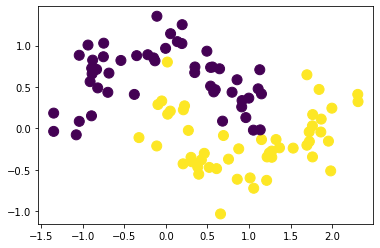

In [43]:
plt.scatter( X[:, 0], X[:, 1], c=y, s=100 );

In [44]:
# This is a good test problem because the classes cannot be separated by a line, e.g. 
# are not linearly separable, requiring a nonlinear method such as a neural network to address.

# We have only generated 100 samples, which is small for a neural network, providing the opportunity 
# to overfit the training dataset and have higher error on the test dataset: a good case for using 
# regularization. Further, the samples have noise, giving the model an opportunity to learn aspects 
# of the samples that don’t generalize.


In [45]:
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [46]:
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

In [48]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.914


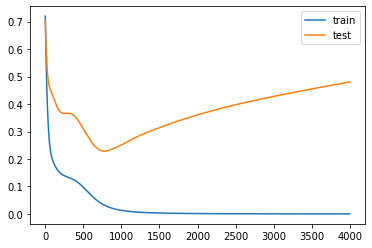

In [49]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [50]:
# We can see that expected shape of an overfit model where test accuracy increases to a 
# point and then begins to decrease again.
# Reviewing the figure, we can also see flat spots in the ups and downs in the validation loss. 
# Any early stopping will have to account for these behaviors. We would also expect that a good 
# time to stop training might be around epoch 800.

In [52]:
# We can update the example and add very simple early stopping.
# As soon as the loss of the model begins to increase on the test dataset, we will stop training.

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [57]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])

Epoch 00213: early stopping


In [59]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.967, Test: 0.814


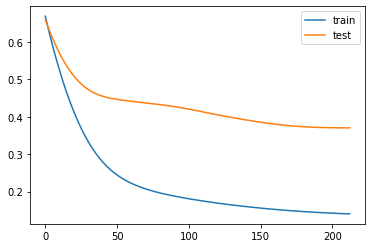

In [60]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [61]:
# Reviewing the line plot of train and test loss, we can indeed see that training was 
# stopped at the point when validation loss began to plateau for the first time.

In [62]:
# We can improve the trigger for early stopping by waiting a while before stopping.
# This can be achieved by setting the “patience” argument.

# In this case, we will wait 200 epochs more before training is stopped. Specifically, this means that 
# we will allow training to continue for up to an additional 200 epochs after the point that validation 
# loss started to degrade, giving the training process an opportunity to get across flat spots or 
# find some additional improvement.

In [63]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [64]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])

Epoch 01023: early stopping


In [66]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.943


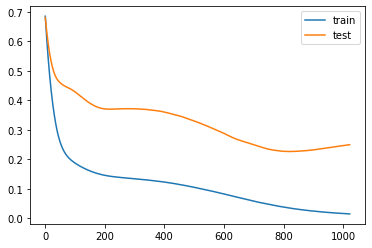

In [67]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [68]:
# Reviewing the line plot of loss during training, we can see that the patience allowed the 
# training to progress past some small flat and bad spots.

# We can also see that test loss started to increase again in the last approximately 100 epochs.
# This means that although the performance of the model has improved, we may not have the 
# best performing or most stable model at the end of training. We can address this by using a 
# ModelChecckpoint callback.

In [69]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [70]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


In [71]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])


Epoch 00001: val_accuracy improved from -inf to 0.52857, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.52857 to 0.78571, saving model to best_model.h5

Epoch 00003: val_accuracy did not improve from 0.78571

Epoch 00004: val_accuracy did not improve from 0.78571

Epoch 00005: val_accuracy did not improve from 0.78571

Epoch 00006: val_accuracy did not improve from 0.78571

Epoch 00007: val_accuracy did not improve from 0.78571

Epoch 00008: val_accuracy did not improve from 0.78571

Epoch 00009: val_accuracy did not improve from 0.78571

Epoch 00010: val_accuracy did not improve from 0.78571

Epoch 00011: val_accuracy did not improve from 0.78571

Epoch 00012: val_accuracy did not improve from 0.78571

Epoch 00013: val_accuracy did not improve from 0.78571

Epoch 00014: val_accuracy did not improve from 0.78571

Epoch 00015: val_accuracy did not improve from 0.78571

Epoch 00016: val_accuracy did not improve from 0.78571

Epoch 00017: val_accuracy did not im

In [73]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.943


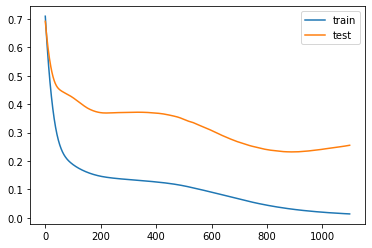

In [74]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [ ]:
# In this case, we don’t see any further improvement in model accuracy on the test dataset. 
# Nevertheless, we have followed a good practice.

# Why not monitor validation accuracy for early stopping?
# This is a good question. The main reason is that accuracy is a coarse measure of model 
# performance during training and that loss provides more nuance when using early stopping with 
# classification problems. The same measure may be used for early stopping and model checkpointing 
# in the case of regression, such as mean squared error.